<a href="https://colab.research.google.com/github/omid-sar/Interview-Preparation/blob/main/ML_interview/ML_int_twitter_toxic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [69]:
!wget https://raw.githubusercontent.com/omid-sar/Project_Data_Hub/main/twitter_toxic_final_balanced_dataset.csv

--2024-05-08 13:18:26--  https://raw.githubusercontent.com/omid-sar/Project_Data_Hub/main/twitter_toxic_final_balanced_dataset.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5518854 (5.3M) [text/plain]
Saving to: ‘twitter_toxic_final_balanced_dataset.csv.2’

twitter_toxic_final 100%[===================>]   5.26M  --.-KB/s    in 0.08s   

2024-05-08 13:18:26 (62.2 MB/s) - ‘twitter_toxic_final_balanced_dataset.csv.2’ saved [5518854/5518854]



In [70]:
import pandas as pd
df_org = pd.read_csv("twitter_toxic_final_balanced_dataset.csv", usecols=["Toxicity", "tweet"])
df_org.head()

,Toxicity,tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation


In [71]:
for _ in range(10):
  rand = np.random.randint(len(df_org))
  print(df_org.iloc[rand]["tweet"], df_org.iloc[rand]["Toxicity"])

i love bad bitches thats my fucking problem 1
grow old along with me; the best is yet to be. ârobe browning #wedding   #love  0
sta your #morning off right. #lemonwater #cleanse #detox #begoodtoyourself #healthy   #tuesdaymotivation  0
Lololol joey lattimes phone just called him retarded 1
if dudes wana fuck eachother n get married, i can never be mad at tht. jus means more females for me! #damn50 #orlando # #omg50 #gay   0
RT @stepheeezyy: Rt *nigga *bitch *him &#8220;@187XO_: ' I will never date a female with another niggah name on her lol . Wtf .&#8221; 1
Most of you hoes copy and paste but there has to be someone they are copying from. And to you I give you my props 1
no more uni now until after my 3 week first placement. plenty to do at home though haha #studentnurse #placement   0
had me first interview with exposed vocals!!!   @ crestview,â¦  0
now playing  :  ackroyd poppy - " aliquot" on     music song  0


MAX LENGTH: 754


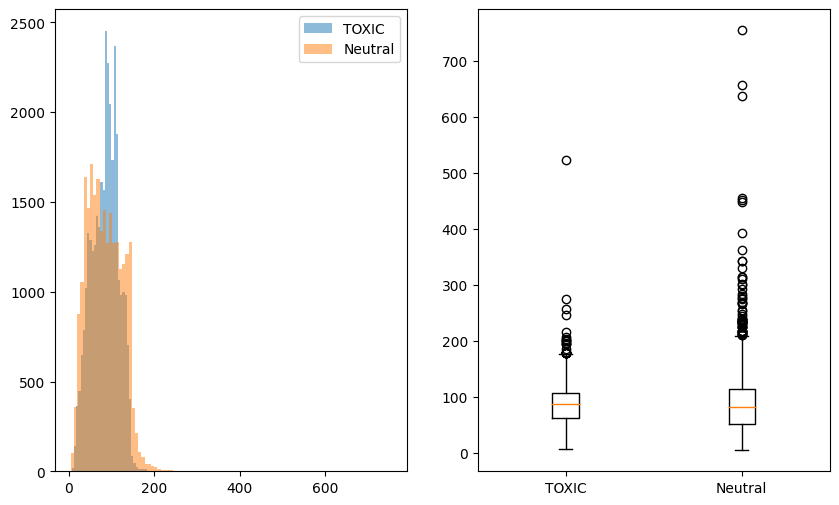

In [72]:
import matplotlib.pyplot as plt

df = df_org.copy()

df["tweet_len"] = [len(seq) for seq in df_org["tweet"]]
toxic_len = df[df["Toxicity"] == 0]["tweet_len"]
norm_len = df[df["Toxicity"] == 1]["tweet_len"]

print("MAX LENGTH:" ,max(df["tweet_len"]))

fig , (ax1, ax2) = plt.subplots(1, 2, figsize=(10,6))
ax1.hist(toxic_len, bins=100, alpha=0.5, label="TOXIC")
ax1.hist(norm_len, bins=100, alpha=0.5, label="Neutral")
ax1.legend()

ax2.boxplot([toxic_len, norm_len], labels=["TOXIC", "Neutral"])
plt.show()


In [73]:
df = df[df["tweet_len"] <= 200].drop("tweet_len", axis=1)
X = df["tweet"].values
y = df["Toxicity"].values
sequences = [sequence for sequence in X]

In [74]:
from transformers import DistilBertTokenizer, BertTokenizer

distilled_tokenizer = DistilBertTokenizer.from_pretrained("distilbert-base-uncased")
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

In [75]:
model_inputs = tokenizer(sequences, padding=True, return_tensors='pt')
model_inputs

{'input_ids': tensor([[  101,  1030,  5310,  ...,     0,     0,     0],
        [  101,  1030,  5310,  ...,     0,     0,     0],
        [  101, 12170, 14945,  ...,     0,     0,     0],
        ...,
        [  101,  2402, 10131,  ...,     0,     0,     0],
        [  101,  2017,  2226,  ...,     0,     0,     0],
        [  101,  1066,  1066,  ...,     0,     0,     0]]), 'token_type_ids': tensor([[0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        ...,
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]])}

In [76]:
print("input_ids: \n",  model_inputs.input_ids[0].shape, "\n token_type_ids: \n" , model_inputs.token_type_ids[0].shape,"\n attention_mask: \n" , model_inputs.attention_mask[0].shape)

input_ids: 
 torch.Size([119]) 
 token_type_ids: 
 torch.Size([119]) 
 attention_mask: 
 torch.Size([119])


In [77]:
model_dist_inputs = distilled_tokenizer(sequences, padding=True, return_tensors='pt')
model_dist_inputs

{'input_ids': tensor([[  101,  1030,  5310,  ...,     0,     0,     0],
        [  101,  1030,  5310,  ...,     0,     0,     0],
        [  101, 12170, 14945,  ...,     0,     0,     0],
        ...,
        [  101,  2402, 10131,  ...,     0,     0,     0],
        [  101,  2017,  2226,  ...,     0,     0,     0],
        [  101,  1066,  1066,  ...,     0,     0,     0]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]])}

In [78]:
print("input_ids: \n ",  model_dist_inputs.input_ids[0].shape, "\n attention_mask: \n" , model_dist_inputs.attention_mask[0].shape)

input_ids: 
  torch.Size([119]) 
 attention_mask: 
 torch.Size([119])


In [79]:
import torch
from torch.utils.data import DataLoader, TensorDataset

labels = torch.tensor(y)
dataset = TensorDataset(model_inputs["input_ids"], model_dist_inputs["attention_mask"], labels)
dataloader = DataLoader(dataset, batch_size=16, shuffle=True, num_workers=4 , pin_memory=True)


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


In [80]:
from torch.utils.data import random_split

train_size = int(len(dataset)* 0.7)
val_size = int(len(dataset)* 0.2)
test_size = len(dataset) - train_size - val_size

train_dataset, val_dataset, test_dataset = random_split(dataset, [train_size, val_size, test_size])

In [81]:
train_dataset